In [36]:
from __future__ import unicode_literals
import numpy as np
import codecs
import re
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

datasets_path = 'C:/Users/OptimusPrime/Desktop/Studia/NLP1/Natural-Language-Processing-1/Week 2/Data'

In [37]:
def load_vocabulary():
    voc = dict()
    with codecs.open(datasets_path + '\\odm.txt', 'r', 'utf-8') as f:
        text = f.read().lower() #read whole file to string
        lines = text.split('\r\n') #zwraca liste stringow(linii)
        for line in lines:
            words = np.array(line.split(', '))
            for word in words:
                voc[word] = words[0]
    return voc


def load_potop():
    with codecs.open(datasets_path + '\\potop.txt', 'r', 'utf-8') as f:
        text = f.read().lower()
        text = re.sub(r"[\\\^\$\.\|\?\*\+\(\)\[\]\{1-9\"!\-_=%<>,]", '', text)
        lines = re.findall(r"[\w']+", text)
        return np.array(lines)
    
voc = load_vocabulary()
potop = load_potop()
potop_words = [voc[word] if word in voc else None for word in potop]
potop_words_filtered = [x for x in potop_words if x is not None]

In [38]:
counted_words = Counter(potop_words_filtered)
print("A few most common words:\n" + str(counted_words.most_common(10)))

A few most common words:
[('on', 18321), ('i', 13320), ('się', 9713), ('w', 8158), ('na', 6817), ('z', 6040), ('to', 4872), ('być', 4559), ('do', 4337), ('pan', 4140)]


In [39]:
most_common_words = counted_words.most_common()
index = 0
counter = 0
number_of_words = list()
frequent_words = list()

for common_word in most_common_words:
    counter += common_word[1]
    index += 1
    number_of_words.append(common_word[1])
    frequent_words.append(common_word[0])
    if counter > potop.size/2:
        break
happax_legomena = sum([1 for word in most_common_words if word[1] == 1])

Number of words in potopie: 384540
Number of words which build up 50% of the text: 164
Number of hapax legomenas: 4093


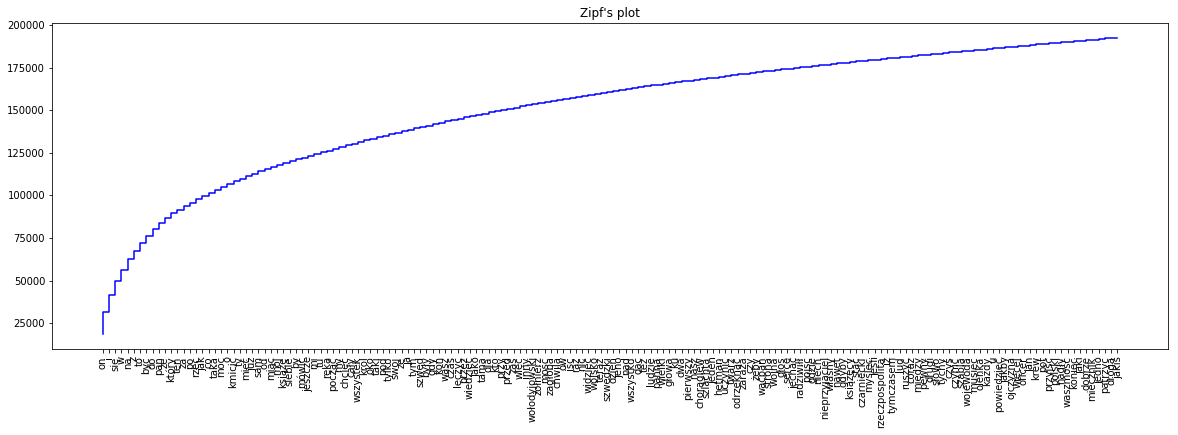

In [40]:
print("Number of words in potopie: " + str(potop.size))
print('Number of words which build up 50% of the text: ' + str(index))
print('Number of hapax legomenas: ' + str(happax_legomena))
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,6))
cum_sum = np.cumsum(number_of_words)
plt.step(frequent_words, cum_sum, c='blue')
plt.xticks(rotation=90)
plt.title("Zipf's plot")
plt.show()

In [41]:
counted_words_desc = list([x[1] for x in most_common_words])
counted_words_asc = list(reversed([x[1] for x in most_common_words]))
X = range(1, len(counted_words_asc)+1)

def funcK(x, K):
    return K/x

def funcBdP(x, B, d, P):
    return P/((x+d)**B)

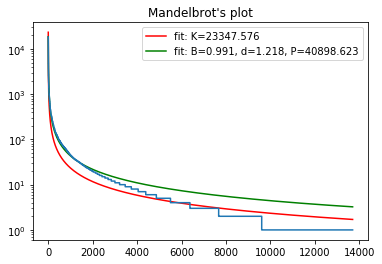

In [42]:
poptK, pcovK = curve_fit(funcK, X, counted_words_desc)
poptBdP, pcovBdP = curve_fit(funcBdP, X, counted_words_desc, p0=[4,4,4])

plt.yscale('log')
plt.plot(X, funcK(X, *poptK), 'r-', label='fit: K=%5.3f' % tuple(poptK))
plt.plot(X, funcBdP(X, *poptBdP), 'g-', label='fit: B=%5.3f, d=%5.3f, P=%5.3f' % tuple(poptBdP))
plt.step(X, counted_words_desc)
plt.title("Mandelbrot's plot")
plt.legend()
plt.show()

In [43]:
cv = CountVectorizer(ngram_range=(2,2), analyzer='word')
freq_matrix = cv.fit_transform([" ".join(potop)])
terms = cv.get_feature_names()
freqs = freq_matrix.sum(axis=0).A1
terms_with_frequencies = dict(zip(freqs, terms))
import operator
sorted_terms_with_frequencies = sorted(terms_with_frequencies.items(), key=operator.itemgetter(0), reverse=True)
print("Most common word digrams:")
print(sorted_terms_with_frequencies[:10])

Most common word digrams:
[(476, 'się na'), (350, 'się do'), (288, 'pan andrzej'), (271, 'pan wołodyjowski'), (235, 'się nie'), (234, 'na to'), (208, 'pan zagłoba'), (196, 'nie ma'), (194, 'nie tylko'), (184, 'nie było')]


In [44]:
cv = CountVectorizer(ngram_range=(3,3), analyzer='word')
freq_matrix = cv.fit_transform([" ".join(potop)])
terms = cv.get_feature_names()
freqs = freq_matrix.sum(axis=0).A1
terms_with_frequencies = dict(zip(freqs, terms))
import operator
sorted_terms_with_frequencies = sorted(terms_with_frequencies.items(), key=operator.itemgetter(0), reverse=True)
print("Most common word trigrams:")
print(sorted_terms_with_frequencies[:10])

Most common word trigrams:
[(178, 'wasza książęca mość'), (97, 'spis rozdziałów polska'), (96, 'netografia frame henryk'), (82, 'waszej książęcej mości'), (80, 'zwrócił się do'), (76, 'nie może być'), (41, 'od czasu do'), (40, 'tom ii rozdział'), (39, 'waszej królewskiej mości'), (37, 'nie może inaczej')]
